In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = [
    [0.5,0],
    [0.75,0],
    [1,0],
    [1.25,0],
    [1.5,0],
    [1.75,0],
    [1.75,1],
    [2,0],
    [2.25,1],
    [2.5,0],
    [2.75,1],
    [3,0],
    [3.25,1],
    [3.5,0],
    [4,1],
    [4.25,1],
    [4.5,1],
    [4.75,1],
    [5,1],
    [5.5,1],
]

data = np.matrix(data) # Shape: (20, 2)

Here, we see 20 rows and 2 columns. One of these columns is our target variable, which is if the student passed or not. 

So, $m = 20$ and $n = 1$ However, we also need to account for the bias column, so our parameters will look like this: $$\beta_0 + \beta_1 * X_1$$ where $X_1$ is the number of hours the student studied.

With this in mind, we can start implementing our own Logistic Regression model. 

Let's start with declaring some necessary functions.

In [3]:
'''
Uses the sigmoid function to return a value between 0 and 1 on the given 
parameter. 
'''
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

'''
Calculates the hypothesis h(theta), which is the probability that the 
student has passed given theta.
'''
def hypothesis(theta, x):
    return sigmoid(np.dot(x, theta.transpose()))

'''
Calculates the cost function J(theta). 
This is what we will be trying to minimize with different values of theta.
'''
def cost_function(hypothesis, x, y, m):
    A = np.dot(np.log(hypothesis).transpose(), y)
    B = np.dot(np.log(hypothesis).transpose(), 1 - y)
    cost = (1 / m) * (np.sum(A + B))
    return cost

'''
Calculates the gradient of the cost function
'''
def gradient(hypothesis, x, y, m):
    error = np.dot((hypothesis - y).transpose(), x)
    return (1 / m) * np.sum(error)


In [4]:
n_iters = 50000
alpha = 0.0001 # Learning rate
m, n = data.shape
X = data[:, 0] # Shape: (20,1)
Y = data[:, 1] # Shape: (20,1)
theta = np.ones((2,1)) # Shape: (2,1)
costs = []

# Below is the loop that performs gradient descent
for i in range(n_iters):
    hyp = hypothesis(theta, X) # Shape: (20, 2)
    cost = cost_function(hyp, X, Y, m) # Shape: (2,1)
    costs.append(cost)
    grad = gradient(hyp, X, Y, m)
    
    theta = theta - alpha * grad
    

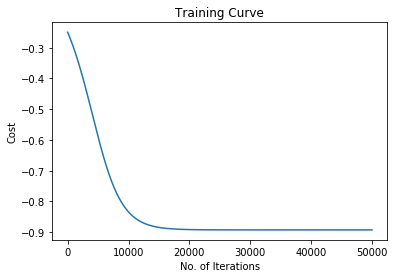

[0.21794949]


In [5]:
plt.plot(np.arange(1, n_iters+1), np.asarray(costs))
plt.title('Training Curve')
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()
print(theta[1])

In [6]:
# Let's check with a valid implementation 
clf = LogisticRegression(fit_intercept=False, 
                         random_state=None, C=1).fit(X,np.ravel(Y))
print(clf.coef_)

[[0.21274231]]


## Conclusion

As you can see, we get pretty similar values for the coefficients. The minor differences may be due to the better optimization algorithm from sklearn, but nonetheless, the values are similar enough.


# Let's try Prof. Tu's interpretation now
The above implementation revolves around how Andrew Ng taught it. Now, let's try another way of going about this.

TODO: Try this after HW4 gets graded

In [ ]:
'''
Calculates the cost function using Prof. Tu's interpretation.
'''
    